In [103]:
import numpy as np
from kernels import dirichlet_kernel_shifted, cosine_kernel, complex_exponential_kernel, exp_decay_torus
from fourier import compute_fourier_coeff

import matplotlib.pyplot as plt

In [104]:
#  why negative fourier coefficients for symmetric kernels??
# why if L=2 the decay rate is off? In general decay rate is not exact when varying parameters (e.g. grid size)

In [105]:
#TODO:
#add docstrings in lastkernel in kernels.py

In [106]:
# Define the interval [0,2L]. 
# We consider the torus [0,1]
L = 1/2
time_span = 2*L- 0
grid_size = 1000
thetas = np.linspace(0, 2*L, grid_size)


Text(0.5, 1.0, 'Fourier coeff of Dirichlet kernel')

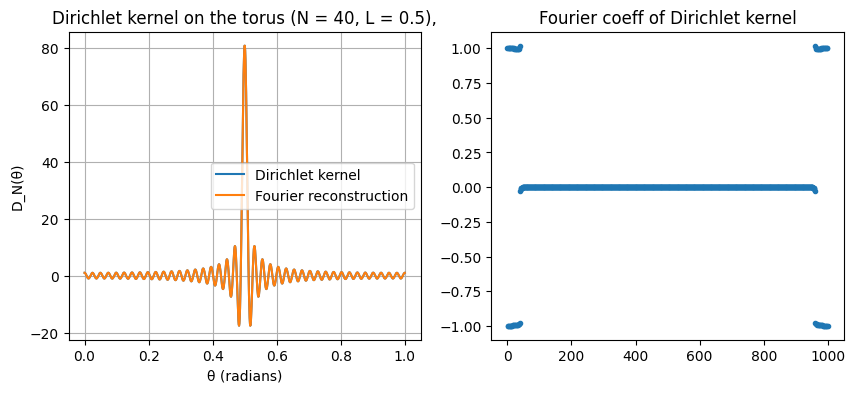

In [107]:
#Dirichlet kernel
#update: should be defined on [0,1]

# Compute the Dirichlet kernel for N = 10 using the updated function
N = 40
dirichlet_values = dirichlet_kernel_shifted(thetas, order = N, L=L)
dirichlet_ker_fourier_coeff = compute_fourier_coeff(dirichlet_values,time_span)

# Plot the Dirichlet kernel and its fourier coefficients in two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(thetas, dirichlet_values, label='Dirichlet kernel')
axs[0].set_title(f'Dirichlet kernel on the torus (N = {N}, L = {L}),')
axs[0].set_xlabel('θ (radians)')
axs[0].set_ylabel(f'D_N(θ)')
axs[0].grid(True)
axs[0].plot(thetas, np.fft.ifft(dirichlet_ker_fourier_coeff*grid_size / time_span), label='Fourier reconstruction')
axs[0].legend()

axs[1].plot((dirichlet_ker_fourier_coeff[:]), '.')
axs[1].set_title('Fourier coeff of Dirichlet kernel')

In [108]:
imag_part = np.imag(dirichlet_ker_fourier_coeff)
print(np.max(np.abs(imag_part)))  # Should be close to zero for a symmetric signal

0.12860681769620239


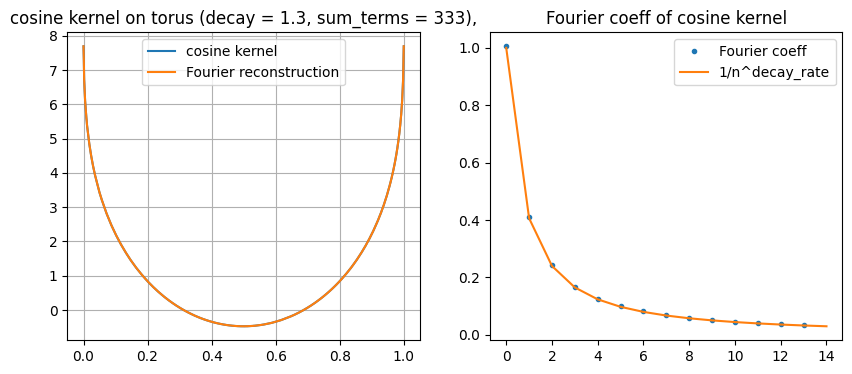

In [109]:
# Sum of cosines kernel

decay_rate = 1.3
num_sum_terms = grid_size //3

cosine_kernel_array = cosine_kernel(thetas, decay_rate=decay_rate, num_terms=num_sum_terms)
cosine_kernel_fourier_coeff = compute_fourier_coeff(cosine_kernel_array,time_span)



# Plot the cosine kernel and its fourier coefficients in two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(thetas, cosine_kernel_array, label='cosine kernel')
axs[0].set_title(f'cosine kernel on torus (decay = {decay_rate}, sum_terms = {num_sum_terms}),')
axs[0].plot(thetas, np.fft.ifft(cosine_kernel_fourier_coeff*grid_size/ time_span), label='Fourier reconstruction')
axs[0].grid(True)
axs[0].legend()

plot_till = 15
axs[1].plot((cosine_kernel_fourier_coeff[1:plot_till]), '.', label = 'Fourier coeff')
axs[1].set_title('Fourier coeff of cosine kernel')
aux_vec=np.arange(1,cosine_kernel_fourier_coeff.size+1, dtype=float)
axs[1].plot((aux_vec[:plot_till]**(-decay_rate)), label='1/n^decay_rate')
axs[1].legend()


In [110]:
imag_part = np.imag(cosine_kernel_fourier_coeff)
print(np.max(np.abs(imag_part)))  # Should be close to zero for a symmetric signal

0.0031591021592981203


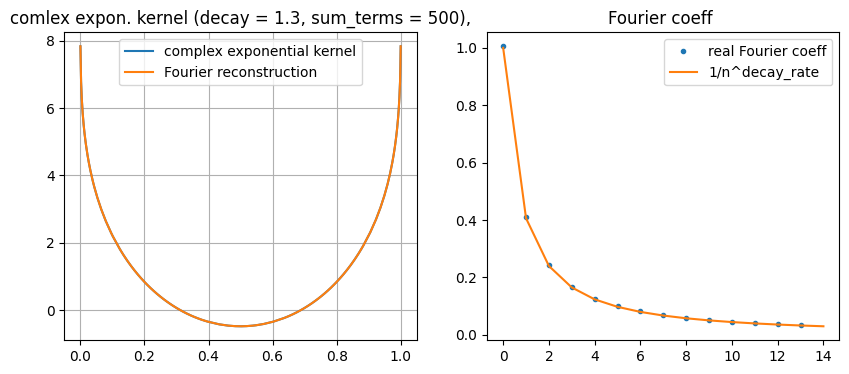

In [111]:
# Complex exponential kernel

num_sum_terms = grid_size//2

complex_expon_kernel_array = complex_exponential_kernel(thetas, decay_rate=decay_rate, num_terms=num_sum_terms)
complex_expon_fourier_coeff= compute_fourier_coeff(complex_expon_kernel_array,time_span)

# Plot the cosine kernel and its fourier coefficients in two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(thetas, complex_expon_kernel_array, label='complex exponential kernel')
axs[0].set_title(f'comlex expon. kernel (decay = {decay_rate}, sum_terms = {num_sum_terms}),')
axs[0].plot(thetas, np.fft.ifft(complex_expon_fourier_coeff*grid_size/ time_span), label='Fourier reconstruction')
axs[0].grid(True)
axs[0].legend()

plot_till = 15
axs[1].plot(np.real(complex_expon_fourier_coeff[1:plot_till]), '.', label = 'real Fourier coeff')
axs[1].set_title('Fourier coeff ')
aux_vec=np.arange(1,complex_expon_fourier_coeff.size+1, dtype=float)
axs[1].plot(aux_vec[:plot_till]**(-decay_rate), label='1/n^decay_rate')
axs[1].legend()

Kernel: Exponential decay on torus 

Fix $\gamma >0$, 

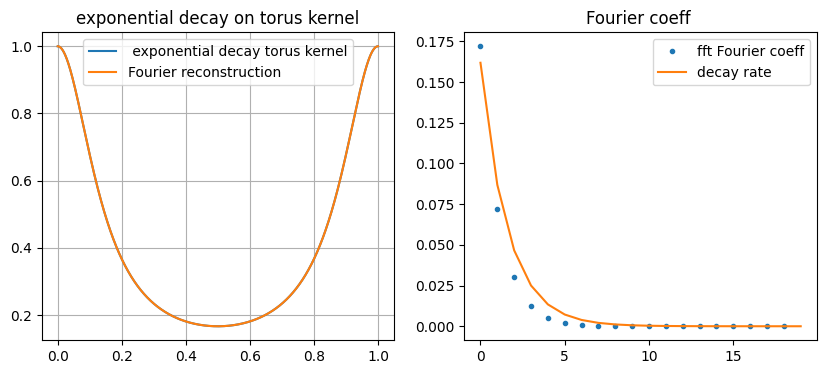

In [112]:
#Exopnential decay on torus kernel

gamma_val = .2
b_val = gamma_val + 1 + np.sqrt(gamma_val*(gamma_val+2))

kernel_exp_decay_torus = exp_decay_torus(thetas, gamma =gamma_val)
kernel_fourier= compute_fourier_coeff(kernel_exp_decay_torus,(time_span)) 

# Plot the cosine kernel and its fourier coefficients in two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(thetas, kernel_exp_decay_torus, label=' exponential decay torus kernel')
axs[0].set_title('exponential decay on torus kernel')
axs[0].plot(thetas, np.fft.ifft(kernel_fourier) * grid_size / time_span, label='Fourier reconstruction')
axs[0].grid(True)
axs[0].legend()

plot_till = 20
axs[1].plot((kernel_fourier[1:plot_till]) , '.', label = 'fft Fourier coeff')
axs[1].set_title('Fourier coeff ')
aux_vec=np.arange(1,kernel_fourier.size+1, dtype=float)
decay =  ((b_val-1) /(b_val+1)) * b_val**(-np.abs(aux_vec))
axs[1].plot(decay[:plot_till], label='decay rate')
axs[1].legend()


In [113]:
# print(np.imag(kernel_fourier))
# print((b_val-1)**2 /  (2*b_val))
# print(gamma_val)


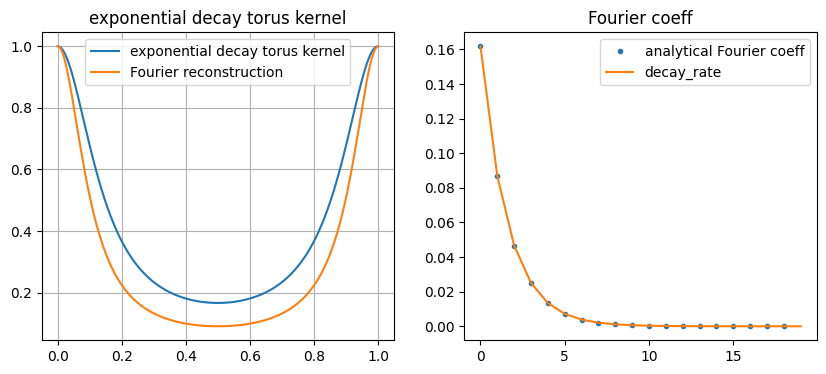

In [114]:
n_fourier_coeff = grid_size

# construct fourier coefficients of the kernel, k_fourier =  ((b_val-1) /(b_val+1)) * b_val**(-np.abs(aux_vec))
k_exp_dec_tor_fourier = np.zeros(n_fourier_coeff, dtype=float)
k_exp_dec_tor_fourier[0] = (b_val-1) /(b_val+1)
for i in range(1, n_fourier_coeff//2):
    k_exp_dec_tor_fourier[i] = ((b_val-1) /(b_val+1)) * b_val**(-i)
    k_exp_dec_tor_fourier[-i] = ((b_val-1) /(b_val+1)) * b_val**(-i)
    

# Plot the cosine kernel and its fourier coefficients in two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(thetas, kernel_exp_decay_torus, label='exponential decay torus kernel')
axs[0].set_title(f'exponential decay torus kernel')
axs[0].plot(thetas, np.fft.ifft(k_exp_dec_tor_fourier) *n_fourier_coeff/ time_span, label='Fourier reconstruction')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(np.real(k_exp_dec_tor_fourier[1:20]), '.', label = 'analytical Fourier coeff')
axs[1].set_title('Fourier coeff')
aux_vec=np.arange(1,k_exp_dec_tor_fourier.size+1, dtype=float)
decay =  ((b_val-1) /(b_val+1)) * b_val**(-np.abs(aux_vec))
axs[1].plot(decay[:20], label='decay_rate')
axs[1].legend()
# print(k_fourier)


In [115]:
# from numpy.random import multivariate_normal

# # # GP samples from a kernel 

# my_kernel= lambda x:  dirichlet_kernel(x, N=7, L=L)

# def mean_fun(x):
#     return 0.0 * x  # mean function

# def kernel_fun(f):
#     return lambda a, b: np.array(
#         [[np.float64(f(a[i], b[j])) for j in range(b.size)]
#          for i in range(a.size)]
#     )

# k = kernel_fun(lambda a, b: my_kernel(np.abs(a-b)))

# k0 = k(thetas[:,None], thetas[:,None])

# m = np.zeros((len(thetas),))

# samples = multivariate_normal(m, k0, size=1).T
# fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# ax0 = axs[0].imshow(
#     k0,
#     origin = 'lower'
# )

# axs[1].plot(thetas, samples, '--')
# axs[0].set_title('Kernel matrix', fontsize = 15)
# axs[1].set_title('Prior samples', fontsize = 15)
# axs[0].set_xticks([])
# axs[0].set_yticks([])
# fig.colorbar(ax0, ax = axs[0])

In [116]:
# #function that draws samples from a GP with kernel kernel_fun
# def GP_sample(kernel_fun, x, n_samples = 1):
#     k = kernel_fun(x[:,None], x[:,None])
#     m = np.zeros((len(x),))
#     samples = multivariate_normal(m, k, size=n_samples).T
#     return samples

# GP_samples = GP_sample(k, x, n_samples = 1)


# #plot the samples
# plt.figure()
# plt.plot(x, GP_samples)
# plt.title('Samples from a GP with periodic kernel')
# plt.show()
